In [1]:
import numpy as np
import random
import string
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt


### Vector Search 

Vector search is a technique used in machine learning and information retrieval to find items or data points that are similar to a given query vector. This technique is often used in recommendation systems, image similarity search, and other applications where you want to find items that are closely related to a reference item. 

One common approach for vector search is to use algorithms like k-Nearest Neighbors (k-NN) or Approximate Nearest Neighbors (ANN) methods. 

#### Generate Synthetic Data

For this example, we'll generate a dataset comprised of 100,000 3-dimensional vectors. For each vector, we'll also generate a label (i.e., a name).

In [2]:
# Set random seed for reproducibility
np.random.seed(42)

# Define dataset parameters
dataset_size = 100000
vector_dimensions = 3

# Generate dataset 
dataset = np.random.rand(dataset_size, vector_dimensions)
print("Dataset shape:", dataset.shape)

# Generate labels
def generate_random_letter():
    return random.choice(string.ascii_lowercase)  # Random lowercase letter

labels = [generate_random_letter() for _ in range(dataset_size)]
dataset_with_labels = np.column_stack((dataset, labels))


Dataset shape: (100000, 3)


#### Generate Search Query Vectors

For this example, we'll generate a set of 5 query vectors on which to perform approximate search.

In [3]:
# Number of search query vectors to pair
vectors = 5

# Generate query vectors
query_vectors = []
for _ in range(vectors):
    query_vector = np.random.rand(vector_dimensions)
    query_vectors.append(query_vector)

# Generate labels    
query_labels = [generate_random_letter() for _ in range(vectors)]
queries_with_labels = np.column_stack((query_vectors, query_labels))

#### Instantiate & Fit NearestNeighbors Model

For this example, we'll search for 5 nearest neighbors to each query vector.

In [4]:
# Number of neighbors for which to search
k = 5 
# Create a NearestNeighbors model
model = NearestNeighbors(n_neighbors=k, algorithm='ball_tree') #'kd_tree' and 'brute'

model.fit(dataset, labels)

NearestNeighbors(algorithm='ball_tree')

#### Perform Vector Search

Perform vector search, returning for search query vector the neighbor indices, labels, and distances of the associated nearest neighbors.

In [5]:

results = []
for i, query_vector in enumerate(query_vectors):
    print(f"Query {i + 1}: {query_vector}")
    distances, indices = model.kneighbors([query_vector])
    results.append((query_vector, dataset[indices[0]], distances[0]))
    print("Nearest neighbors indices:", indices)
    for i in indices:
        print("Nearest neighbors labels:", dataset_with_labels[i][:, -1])
    print("Distances to nearest neighbors:", distances, '\n')
    

Query 1: [0.15705398 0.09550877 0.1379392 ]
Nearest neighbors indices: [[68168 16832 69625 65432 52903]]
Nearest neighbors labels: ['i' 'p' 'g' 'i' 'p']
Distances to nearest neighbors: [[0.0160246  0.02165517 0.02186258 0.0231563  0.0233202 ]] 

Query 2: [0.4734894  0.88453402 0.30922074]
Nearest neighbors indices: [[74488 10602 82408 73992 74017]]
Nearest neighbors labels: ['c' 'a' 's' 'g' 'j']
Distances to nearest neighbors: [[0.0057541  0.01636454 0.0166393  0.01813489 0.02060395]] 

Query 3: [0.44179911 0.03335696 0.60007481]
Nearest neighbors indices: [[61102 82753 58999 26130 58423]]
Nearest neighbors labels: ['v' 'd' 'p' 'p' 'w']
Distances to nearest neighbors: [[0.02042177 0.02322223 0.02508684 0.02668386 0.02736708]] 

Query 4: [0.339533   0.66890528 0.57152068]
Nearest neighbors indices: [[18670 87376 29744  1379 96980]]
Nearest neighbors labels: ['s' 'o' 'f' 'd' 'q']
Distances to nearest neighbors: [[0.00543809 0.01500033 0.016038   0.02222995 0.02263943]] 

Query 5: [0.7250

#### Visualize Query Results

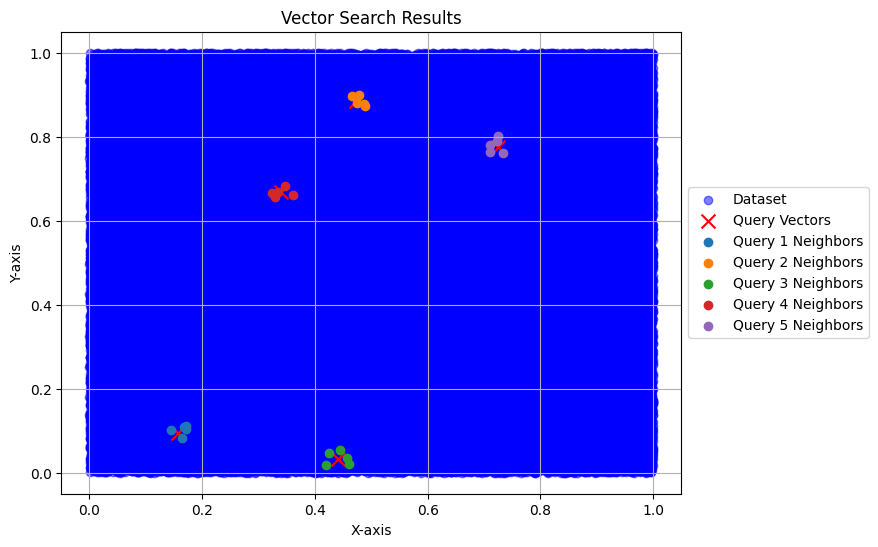

In [6]:
# Create a scatter plot for the dataset
plt.figure(figsize=(8, 6))
plt.scatter(dataset[:, 0], dataset[:, 1], c='blue', label='Dataset', alpha=0.5)

# Plot query vectors
query_vectors = np.array([result[0] for result in results])
plt.scatter(query_vectors[:, 0], query_vectors[:, 1], c='red', marker='x', s=100, label='Query Vectors')

# Plot nearest neighbors
for i, (_, neighbors, _) in enumerate(results):
    plt.scatter(neighbors[:, 0], neighbors[:, 1], label=f'Query {i + 1} Neighbors')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Vector Search Results')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid(True)
plt.show()


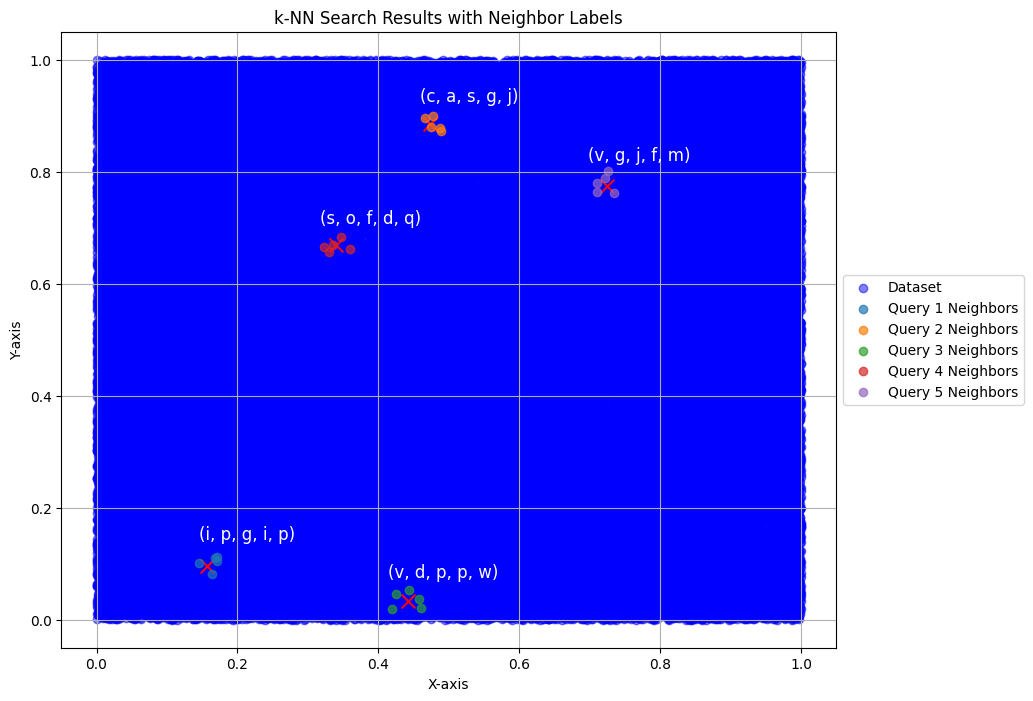

In [7]:
# Isolate indices
neighbors_indices = model.kneighbors(query_vectors, n_neighbors=k, return_distance=False)

# Create a scatter plot for the dataset
plt.figure(figsize=(10, 8))
plt.scatter(dataset[:, 0], dataset[:, 1], c='blue', label='Dataset', alpha=0.5)

# Create a dictionary to store cluster labels and their corresponding centroids
cluster_centroids = {}
# Plot query vectors and nearest neighbors, each cluster with a label
for i, (query_vector, neighbor_indices) in enumerate(zip(query_vectors, neighbors_indices)):
    cluster_labels = [labels[index] for index in neighbor_indices]  # Get labels for neighbors in the cluster
    cluster = ', '.join(cluster_labels)  # Combine labels to form a cluster identifier
    # Calculate the centroid of the cluster
    centroid = np.mean(dataset[neighbor_indices], axis=0)
    # Store the cluster centroid
    cluster_centroids[cluster] = centroid
    # Plot the query vector
    plt.scatter(query_vector[0], query_vector[1], c='red', marker='x', s=100)
    # Plot nearest neighbors as a cluster (same color) with a label
    plt.scatter(dataset[neighbor_indices, 0], dataset[neighbor_indices, 1], label=f'Query {i + 1} Neighbors', alpha=0.7)
    
# Display labels over cluster centroids
label_offset = 0.05
for cluster, centroid in cluster_centroids.items():
    plt.text(centroid[0] + label_offset, centroid[1]+ label_offset, f'({cluster})', fontsize=12, ha='center', va='center', color='white')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('k-NN Search Results with Neighbor Labels')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid(True)
plt.show()
